In [1031]:
# Supress Warnings
        
import warnings
warnings.filterwarnings('ignore')

In [1032]:
# Import important liberaries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

In [1033]:

sns.set_theme(style="darkgrid")

## Data Analysis Plan
### 1. Reading and Inspection:

-  Import and read
-  Inspect the dataframe

### 2. Data Cleanning:

-  Inspect and handle missing values
-  Inspect and handle outliers

 

 ### 1. Reading and inspecting the dataset


In [1034]:
# 1.1 Read heart failur dataset
HF = pd.read_csv('heart_failure_clinical_records_dataset.csv')
HF


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [1035]:
# 1.2 Inspect the dataframe
print(HF.shape)
print('------------------')
print(HF.info())



(299, 13)
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usag

### 2. Cleaning the Data



In [1036]:
# Detect null values
HF.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [1037]:
#  Row-wise null count here
HF.isnull().sum(axis=1)


0      0
1      0
2      0
3      0
4      0
      ..
294    0
295    0
296    0
297    0
298    0
Length: 299, dtype: int64

In [1038]:
HF.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [1039]:
# Inspect and handling outliers
# Describe the dataset
HF.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


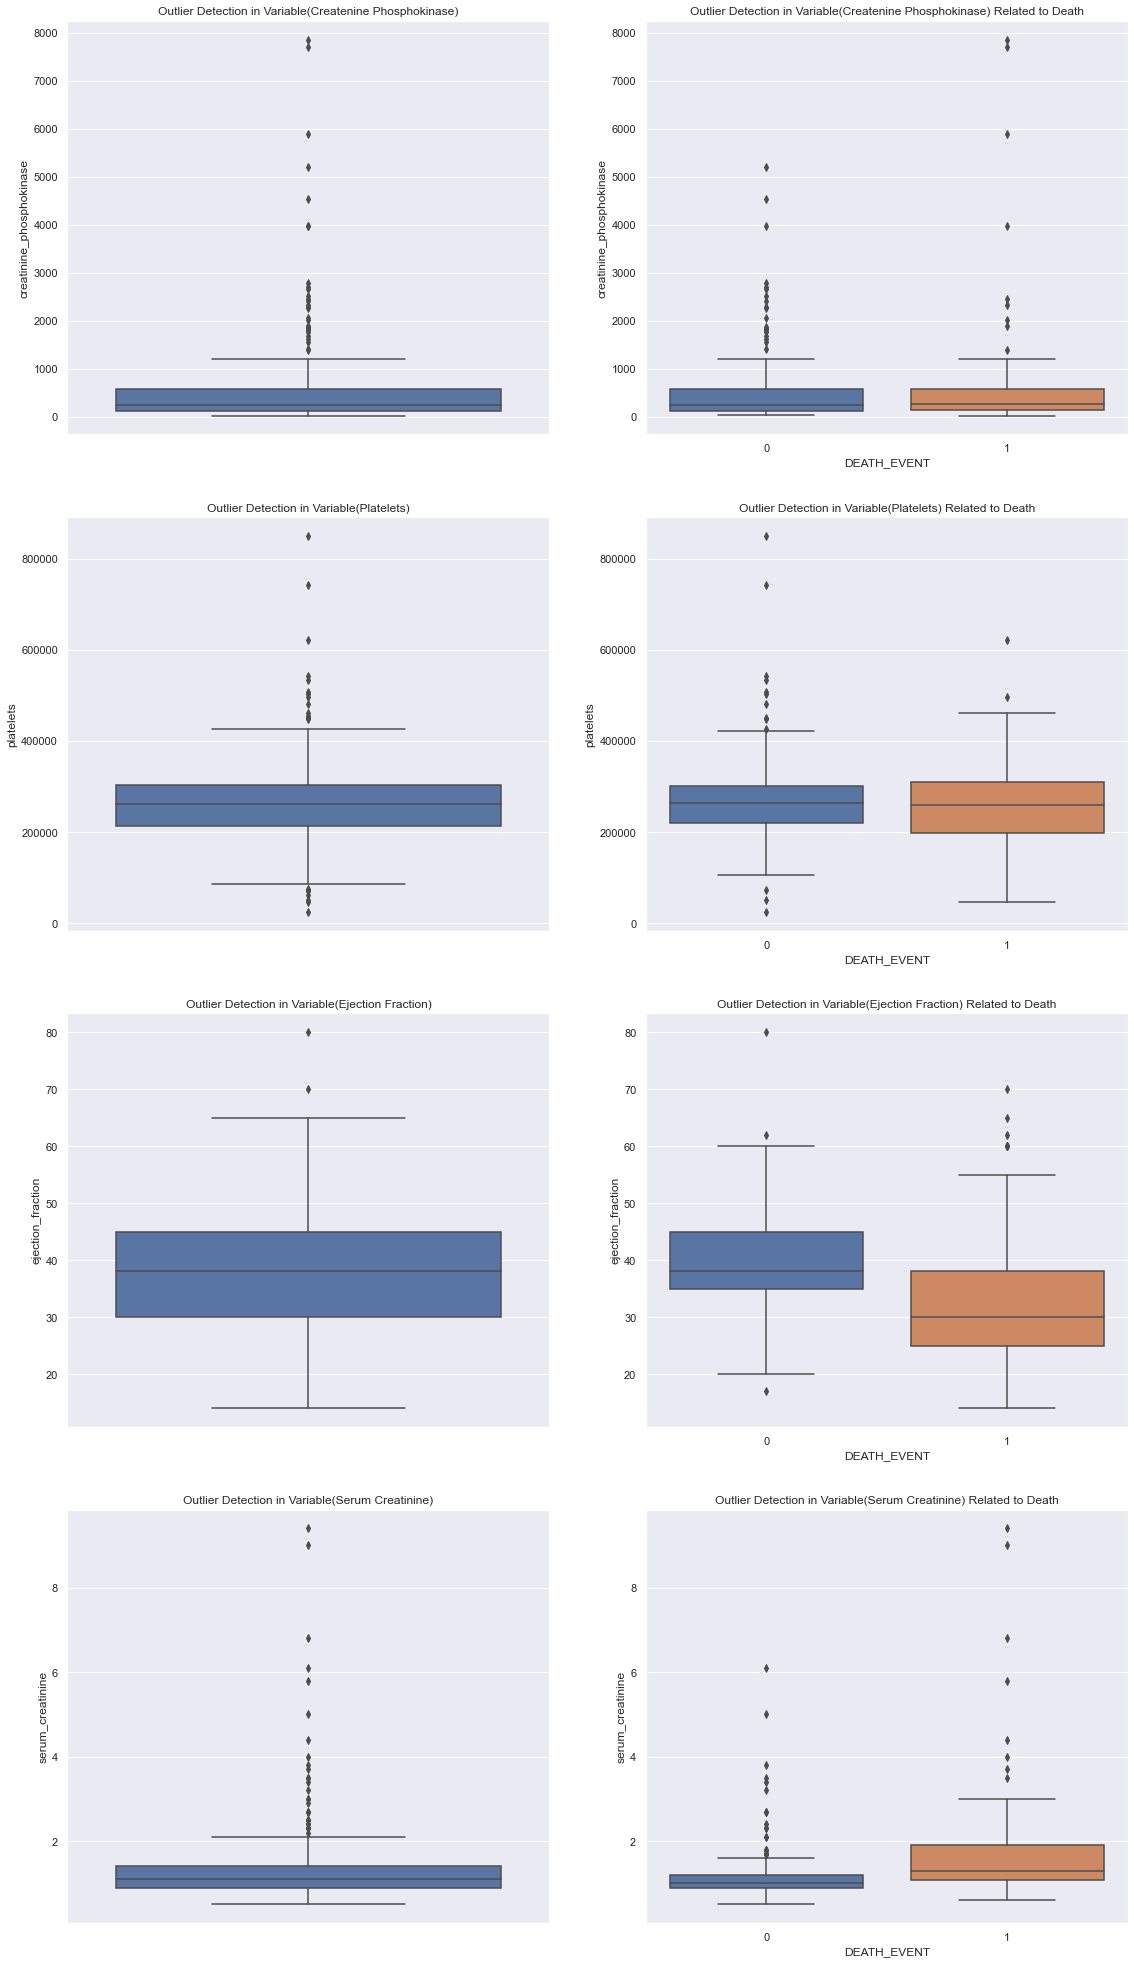

In [1040]:
# Outlier detection
plt.figure(figsize = (19,35))

plt.subplot(4,2,1)
sns.boxplot(y=HF.creatinine_phosphokinase)
plt.title('Outlier Detection in Variable(Createnine Phosphokinase)')

plt.subplot(4,2,2)
sns.boxplot(y=HF.creatinine_phosphokinase,x =HF.DEATH_EVENT)
plt.title('Outlier Detection in Variable(Createnine Phosphokinase) Related to Death')

plt.subplot(4,2,3)
sns.boxplot(y=HF.platelets)
plt.title('Outlier Detection in Variable(Platelets)')

plt.subplot(4,2,4)
sns.boxplot(y= HF.platelets, x= HF.DEATH_EVENT)
plt.title('Outlier Detection in Variable(Platelets) Related to Death')

plt.subplot(4,2,5)
sns.boxplot(y=HF.ejection_fraction)
plt.title('Outlier Detection in Variable(Ejection Fraction)')

plt.subplot(4,2,6)
sns.boxplot(y= HF.ejection_fraction, x=HF.DEATH_EVENT)
plt.title('Outlier Detection in Variable(Ejection Fraction) Related to Death')

plt.subplot(4,2,7)
sns.boxplot(y=HF.serum_creatinine)
plt.title('Outlier Detection in Variable(Serum Creatinine)')


plt.subplot(4,2,8)
sns.boxplot(y= HF.serum_creatinine,x=HF.DEATH_EVENT)
plt.title('Outlier Detection in Variable(Serum Creatinine) Related to Death')
plt.show()

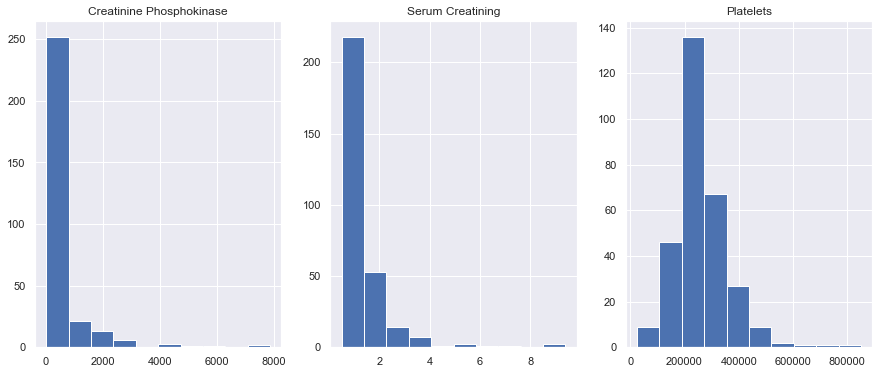

In [1041]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(HF.creatinine_phosphokinase,bins=10);
plt.title('Creatinine Phosphokinase')

plt.subplot(1,3,2)
plt.hist(HF.serum_creatinine,bins=10);
plt.title('Serum Creatining')

plt.subplot(1,3,3)
plt.hist(HF.platelets);
plt.title('Platelets');


In [1042]:
HF = HF[HF.creatinine_phosphokinase < 4000]
HF = HF[HF.serum_creatinine < 6]


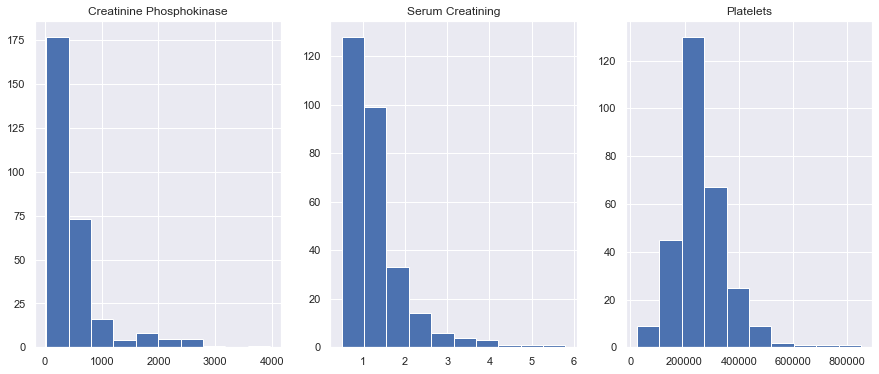

In [1043]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(HF.creatinine_phosphokinase,bins=10);
plt.title('Creatinine Phosphokinase')

plt.subplot(1,3,2)
plt.hist(HF.serum_creatinine,bins=10);
plt.title('Serum Creatining')

plt.subplot(1,3,3)
plt.hist(HF.platelets);
plt.title('Platelets');

## Exploratory Data Analysis

In [1044]:
HF.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,60.783910,0.434483,473.034483,0.420690,37.972414,0.351724,263235.636862,1.311000,136.620690,0.644828,0.317241,131.931034,0.310345
std,11.781852,0.496546,577.386990,0.494523,11.739941,0.478334,98489.127078,0.703448,4.413833,0.479393,0.466207,77.620508,0.463434
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,211250.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,245.500000,0.000000,38.000000,0.000000,262500.000000,1.100000,137.000000,1.000000,0.000000,118.500000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303750.000000,1.400000,140.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.000000,3966.000000,1.000000,80.000000,1.000000,850000.000000,5.800000,148.000000,1.000000,1.000000,285.000000,1.000000


In [1045]:
HF.sex.value_counts()

1    187
0    103
Name: sex, dtype: int64

In [1046]:
HF.DEATH_EVENT.value_counts()

0    200
1     90
Name: DEATH_EVENT, dtype: int64

In [1047]:
HF.diabetes.value_counts()

0    168
1    122
Name: diabetes, dtype: int64

In [1048]:
HF.high_blood_pressure.value_counts()

0    188
1    102
Name: high_blood_pressure, dtype: int64

In [1049]:
HF.smoking.value_counts()

0    198
1     92
Name: smoking, dtype: int64

In [1050]:
HF.anaemia.value_counts()

0    164
1    126
Name: anaemia, dtype: int64

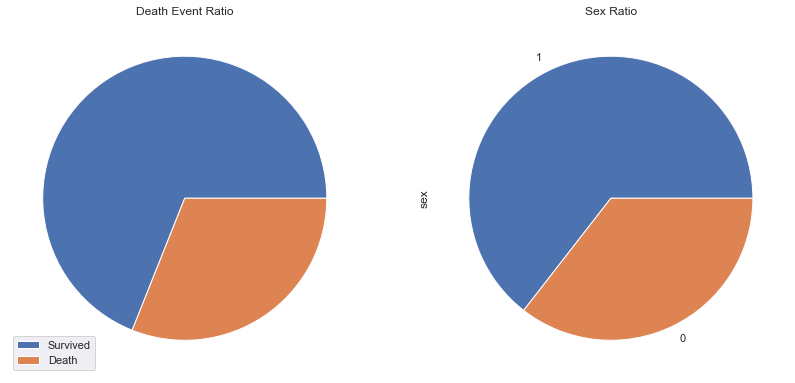

In [1051]:
# Checking balance of output variable
plt.figure(figsize=(14,10))

plt.subplot(1,2,1)
Death_events = HF.groupby('DEATH_EVENT')['DEATH_EVENT'].count()
plt.pie(Death_events);
plt.legend(['Survived','Death']);
plt.title('Death Event Ratio')

plt.subplot(1,2,2)
HF.sex.value_counts().plot(kind='pie');
plt.title('Sex Ratio');


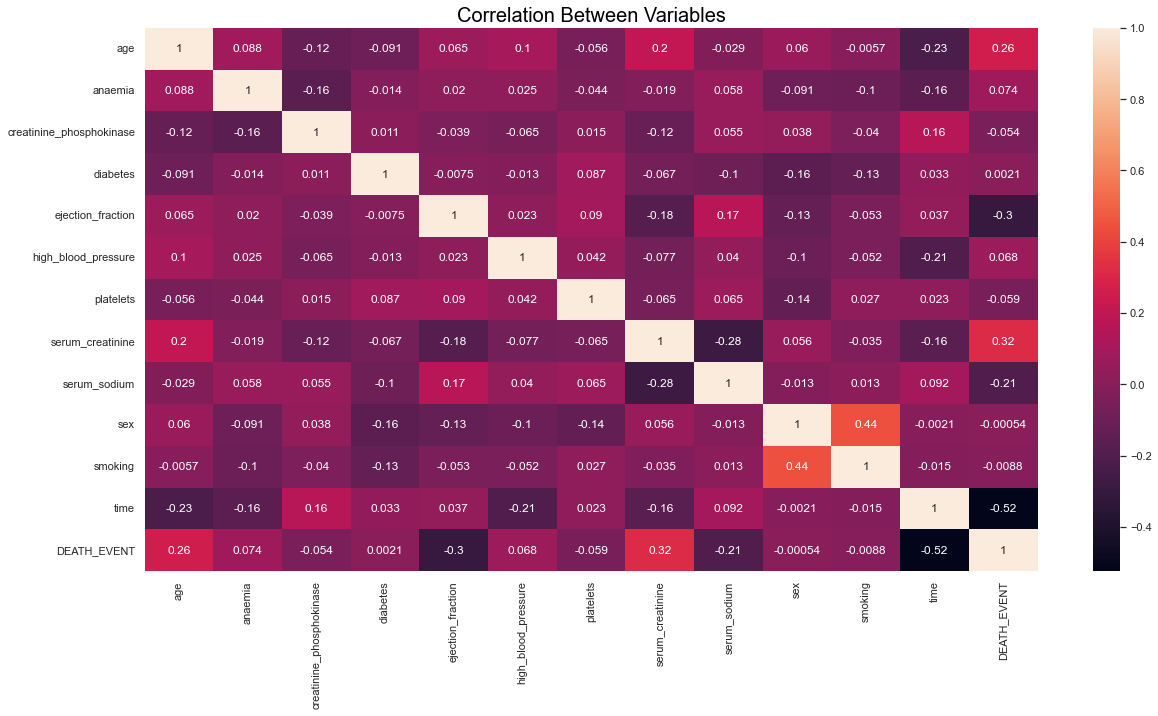

In [1052]:
plt.figure(figsize=(20,10))
sns.heatmap(HF.corr(),annot = True);
plt.title('Correlation Between Variables', fontsize=20,color='black');

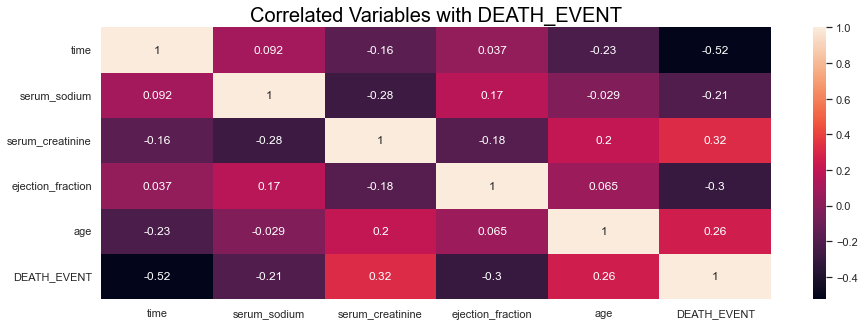

In [1053]:
plt.figure(figsize=(15,5))
sns.heatmap(HF[['time','serum_sodium','serum_creatinine','ejection_fraction','age','DEATH_EVENT']].corr(),annot=True);
plt.title('Correlated Variables with DEATH_EVENT', fontsize=20,color='black');

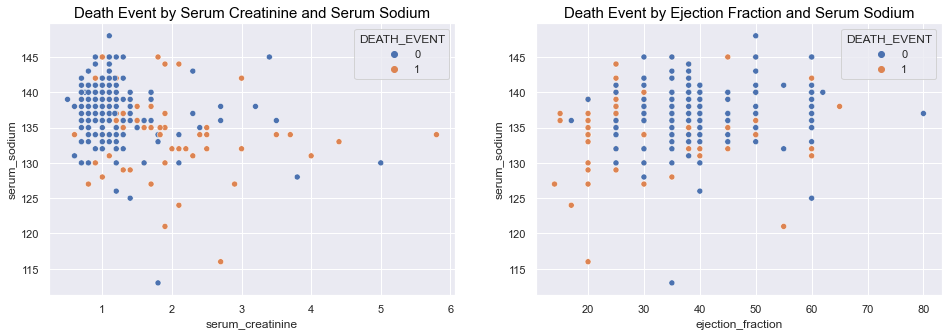

In [1054]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.scatterplot(x=HF.serum_creatinine,y=HF.serum_sodium,hue=HF.DEATH_EVENT);
plt.title('Death Event by Serum Creatinine and Serum Sodium',fontsize=15,color='black');

plt.subplot(1,2,2)
sns.scatterplot(x=HF.ejection_fraction,y=HF.serum_sodium,hue=HF.DEATH_EVENT);
plt.title('Death Event by Ejection Fraction and Serum Sodium',fontsize=15,color='black');

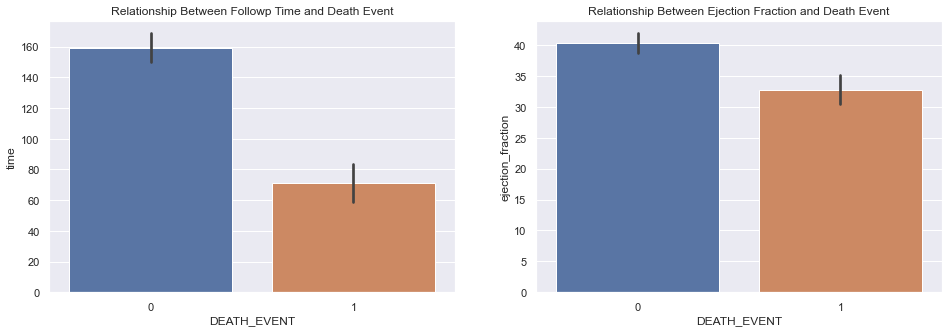

In [1055]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.barplot(y=HF.time,x=HF.DEATH_EVENT);
plt.title('Relationship Between Followp Time and Death Event');

plt.subplot(1,2,2)
sns.barplot(y=HF.ejection_fraction,x=HF.DEATH_EVENT);
plt.title('Relationship Between Ejection Fraction and Death Event');




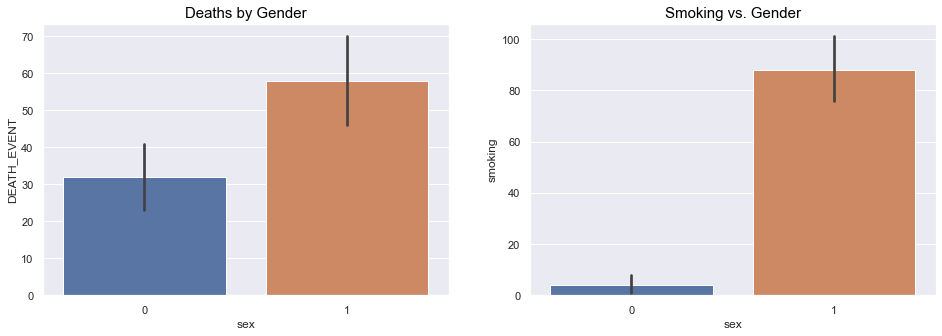

In [1056]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x=HF.sex,y=HF.DEATH_EVENT,estimator=sum);
plt.title('Deaths by Gender',fontsize=15,color='black');

plt.subplot(1,2,2)
sns.barplot(x=HF.sex,y=HF.smoking,estimator=sum);
plt.title('Smoking vs. Gender',fontsize=15,color='black');

In [1057]:
HF['age_category'] = pd.qcut(HF.age,q=5)
HF.age_category.value_counts()

(39.999, 50.0]    72
(63.0, 70.0]      66
(58.0, 63.0]      54
(50.0, 58.0]      49
(70.0, 95.0]      49
Name: age_category, dtype: int64

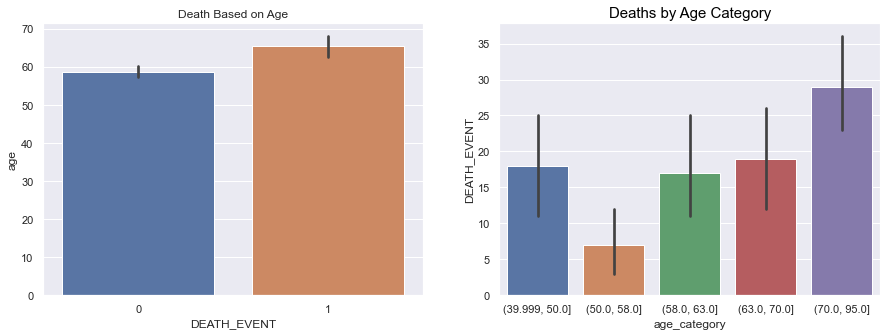

In [1058]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(y=HF.age,x=HF.DEATH_EVENT);
plt.title('Death Based on Age');

plt.subplot(1,2,2)
sns.barplot(y=HF.DEATH_EVENT,x=HF.age_category,estimator=sum);
plt.title('Deaths by Age Category',fontsize=15, color='black');

In [1059]:

HF['ejection_fraction_Cat'] = pd.qcut(HF.ejection_fraction,q=3)

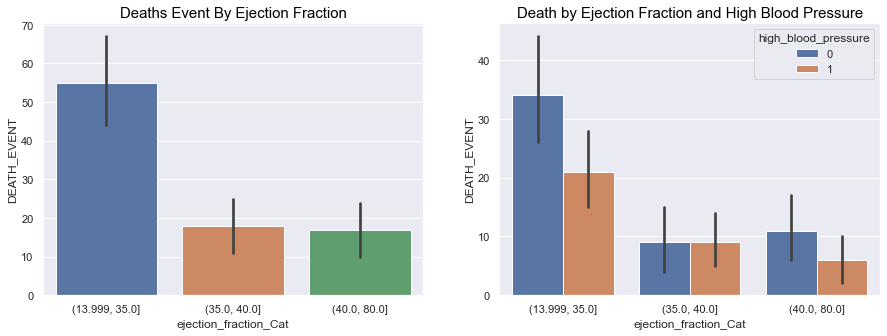

In [1060]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.barplot(x=HF.ejection_fraction_Cat,y=HF.DEATH_EVENT,estimator=sum);
plt.title('Deaths Event By Ejection Fraction',fontsize=15, color='black');

plt.subplot(1,2,2)
sns.barplot(x=HF.ejection_fraction_Cat,y=HF.DEATH_EVENT,hue=HF.high_blood_pressure,estimator=sum);
plt.title('Death by Ejection Fraction and High Blood Pressure',fontsize=15, color='black');

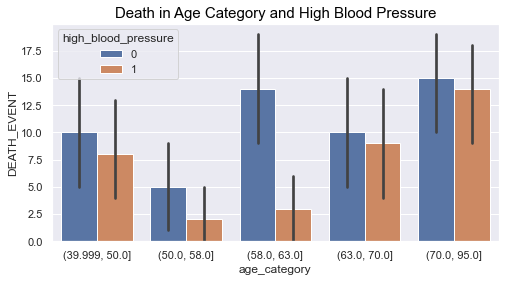

In [1061]:
plt.figure(figsize=(8,4))
sns.barplot(x=HF.age_category,y=HF.DEATH_EVENT,hue=HF.high_blood_pressure,estimator=sum);
plt.title('Death in Age Category and High Blood Pressure',fontsize=15, color='black');

Text(0.5, 1.0, 'Deaths Event By Ejection Fraction')

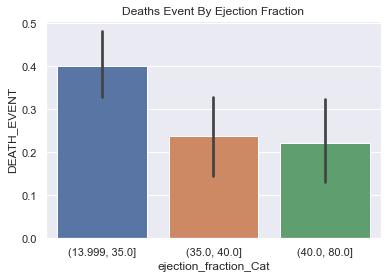

In [1062]:
sns.barplot(x=HF.ejection_fraction_Cat,y=HF.DEATH_EVENT);
plt.title('Deaths Event By Ejection Fraction')

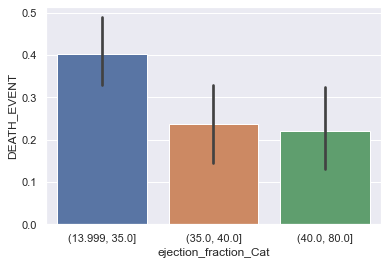

In [1063]:
sns.barplot(x=HF.ejection_fraction_Cat,y=HF.DEATH_EVENT);

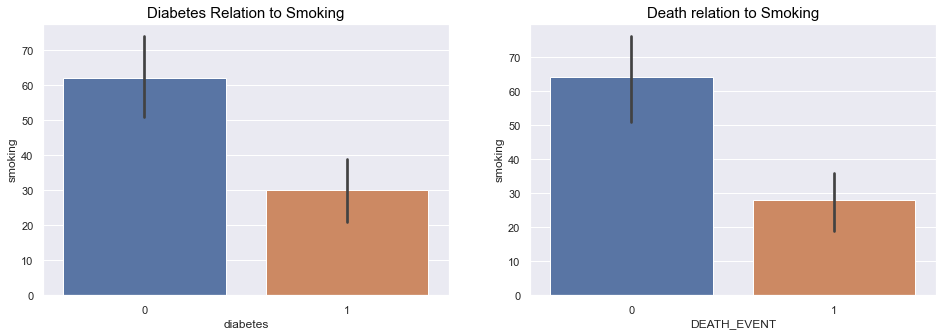

In [1064]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.barplot(y=HF.smoking,x=HF.diabetes,estimator=sum);
plt.title('Diabetes Relation to Smoking',fontsize=15,color='black');


plt.subplot(1,2,2)
sns.barplot(x=HF.DEATH_EVENT,y=HF.smoking,estimator=sum);
plt.title('Death relation to Smoking',fontsize=15,color='black');

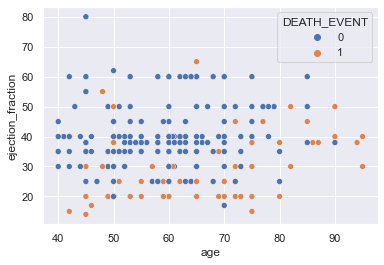

In [1065]:
sns.scatterplot(x=HF.age,y=HF.ejection_fraction,hue=HF.DEATH_EVENT);

In [1066]:
HF['platelets_cat'] = pd.qcut(HF.platelets,q=4)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

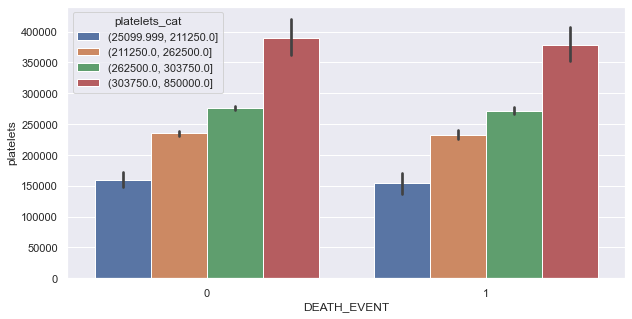

In [1067]:
plt.figure(figsize=(10,5))
sns.barplot(x=HF.DEATH_EVENT,y=HF.platelets,hue=HF.platelets_cat)

In [1068]:
# Split Train / Test 
from sklearn.model_selection import train_test_split

In [1069]:
# Get input variables 
x = HF.drop(['age_category','ejection_fraction_Cat','platelets_cat','DEATH_EVENT'],axis = 1)
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8


In [1070]:
# Get the output variable
y = HF.DEATH_EVENT
y.head()

0    1
2    1
3    1
4    1
5    1
Name: DEATH_EVENT, dtype: int64

In [1071]:
# Split the data into Train Test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=70)

In [1072]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=30)
x_res, y_res = sm.fit_resample(x_train, y_train)

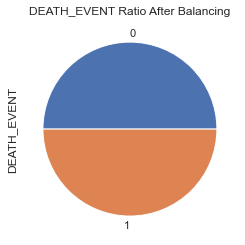

In [1073]:
y_res.value_counts().plot(kind='pie');
plt.title('DEATH_EVENT Ratio After Balancing');

#### Feature Scalling

In [1074]:
# Import Min / Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [1075]:
scaler = MinMaxScaler()

#x_res[['creatinine_phosphokinase','platelets']] = scaler.fit_transform(x_res[['creatinine_phosphokinase','platelets']])

#x_test[['creatinine_phosphokinase','platelets']] = scaler.fit_transform(x_test[['creatinine_phosphokinase','platelets']])

x_res[['age','creatinine_phosphokinase','ejection_fraction',
         'platelets','serum_creatinine','serum_sodium','time']] = scaler.fit_transform(x_res[['age','creatinine_phosphokinase','ejection_fraction',
        'platelets','serum_creatinine','serum_sodium','time']])

x_test[['age','creatinine_phosphokinase','ejection_fraction',
         'platelets','serum_creatinine','serum_sodium','time']] = scaler.fit_transform(x_test[['age','creatinine_phosphokinase','ejection_fraction',
        'platelets','serum_creatinine','serum_sodium','time']])


In [1076]:
x_res.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.545455,0,0.286858,0,0.318182,1,0.339314,0.056604,0.571429,0,0,0.501779
1,0.163636,0,0.270113,0,0.090909,1,0.356286,0.113208,0.657143,1,1,0.181495
2,0.454545,0,0.194758,1,0.242424,0,0.271427,0.150943,0.657143,1,1,0.740214
3,0.327273,0,0.030943,1,0.363636,1,0.276276,0.094340,0.742857,1,0,0.804270
4,0.163636,1,0.008009,0,0.545455,0,0.129591,0.094340,0.771429,0,0,0.508897


In [1077]:
x_test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
211,0.181818,0,0.141770,0,0.94,1,0.110613,0.058824,0.791667,1,1,0.679104
19,0.145455,1,0.141770,1,0.80,0,0.020927,0.382353,0.000000,0,0,0.018657
14,0.163636,1,0.014456,0,0.30,1,0.529148,0.117647,0.708333,0,0,0.007463
155,0.363636,1,0.052752,1,0.20,0,0.180867,0.323529,0.791667,1,0,0.410448
190,0.727273,0,0.141770,1,0.40,0,0.414051,0.441176,0.541667,1,0,0.611940


# 3. Model Building

In [1078]:
# ROC and AUC
def roc_cure_plot(model,x_test_n):
    logit_roc_auc = roc_auc_score(y_test, model.predict(x_test_n))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test_n)[:,1])
    plt.figure(figsize=(4,4))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic(ROC) \n The AUC value is: {:2f}'.format(logit_roc_auc))
    plt.legend(loc="lower right")
    plt.show()

No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.87      0.84      0.86        57
           1       0.72      0.77      0.74        30

    accuracy                           0.82        87
   macro avg       0.80      0.80      0.80        87
weighted avg       0.82      0.82      0.82        87

Accuracy of Random Forest Classifier on training set: 0.989510
Accuracy of Random Forest Classifier on test set: 0.816092


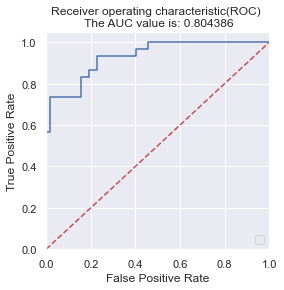

In [1079]:
# Importing random forest classifier from sklearn library



# Set parameter 'max_features': ['auto', 'sqrt']
RFModel=RandomForestClassifier(class_weight = 'balanced', criterion = 'gini',max_depth=7, min_samples_leaf = 1, min_samples_split =5)

# Fit the model
RFModel.fit(x_res, y_res)

# Predict
y_pred = RFModel.predict(x_test)

# Getting key metrics
print(classification_report(y_test, y_pred))

print('Accuracy of Random Forest Classifier on training set: {:2f}'.format(RFModel.score(x_res,y_res)))
print('Accuracy of Random Forest Classifier on test set: {:2f}'.format(RFModel.score(x_test,y_test)))

# Plotting ROC curve
roc_cure_plot(RFModel,x_test)

## Feature Selection using Decision Trees

In [1080]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
DT = DecisionTreeClassifier(class_weight='balanced',criterion ='gini', max_depth = 7, min_samples_leaf= 2, min_samples_split= 2, splitter= 'best')
DT.fit(x_res, y_res)

features_DT = pd.Series(DT.feature_importances_, index=x_res.columns).sort_values(ascending=False)

features_DT

time                        0.435615
serum_creatinine            0.249284
ejection_fraction           0.152206
age                         0.063324
creatinine_phosphokinase    0.037042
sex                         0.017419
platelets                   0.017280
diabetes                    0.012833
serum_sodium                0.009835
high_blood_pressure         0.005161
anaemia                     0.000000
smoking                     0.000000
dtype: float64

In [1081]:
# Setting data sets based on selected features

x_train_selected = x_res[['time','serum_creatinine','ejection_fraction','age','creatinine_phosphokinase','platelets','sex','diabetes']]
x_test_selected = x_test[['time','serum_creatinine','ejection_fraction','age','creatinine_phosphokinase','platelets','sex','diabetes']]




#### Checking For VIF

In [1082]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1083]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_selected.columns
vif['VIF'] = [variance_inflation_factor(x_train_selected.values, i) for i in range(x_train_selected.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,platelets,5.00
3,age,4.83
2,ejection_fraction,4.65
0,time,3.28
1,serum_creatinine,2.80
6,sex,2.29
4,creatinine_phosphokinase,1.69
7,diabetes,1.59


## Random Forest using Selected Features

No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.87      0.82      0.85        57
           1       0.70      0.77      0.73        30

    accuracy                           0.80        87
   macro avg       0.78      0.80      0.79        87
weighted avg       0.81      0.80      0.81        87

Accuracy of Random Forest Classifier on training set: 0.986014
Accuracy of Random Forest Classifier on test set: 0.804598


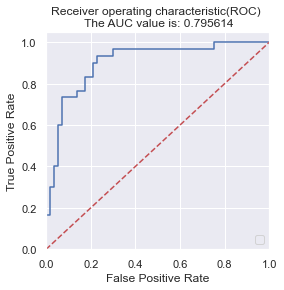

In [1085]:
# After Feature Selection with Random Forest

RFModel2=RandomForestClassifier(class_weight = 'balanced', criterion = 'gini',max_depth=7, min_samples_leaf = 1, min_samples_split =5)

# Fit the model
RFModel2.fit(x_train_selected, y_res)

# Predict
y_pred = RFModel2.predict(x_test_selected)

# Getting key metrics
print(classification_report(y_test, y_pred))

print('Accuracy of Random Forest Classifier on training set: {:2f}'.format(RFModel2.score(x_train_selected,y_res)))
print('Accuracy of Random Forest Classifier on test set: {:2f}'.format(RFModel2.score(x_test_selected,y_test)))

# Plotting ROC curve
roc_cure_plot(RFModel2,x_test_selected)

## Logistic Regression

In [1086]:
# After Feature Selection using RFE
import statsmodels.api as statmodel


In [1087]:
logHF = statmodel.GLM(y_res,(statmodel.add_constant(x_train_selected)), family = statmodel.families.Binomial())
logHF=logHF.fit()
logHF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  286
Model:                            GLM   Df Residuals:                      277
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -93.495
Date:                Wed, 02 Mar 2022   Deviance:                       186.99
Time:                        12:21:28   Pearson chi2:                     283.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.0560      1.002      3.049      0.002       1.092       5.020
time                        -6.9009      1.021     -6.760      0.000      -8.902      -4.900
serum_creatinine             4.7100      1.925      2.447      0.014       0.937       8.483
ejection_fraction           -7.1369      1.339     -5.328      0.000      -9.762      -4.512
age                          4.2668      1.056      4.041      0.000       2.197       6.337
creatinine_phosphokinase     1.9526      1.005      1.942      0.052      -0.018       3.923
platelets                   -0.5371      1.642     -0.327      0.744      -3.755       2.681
sex                         -0.7623      0.389     -1.958      0.050      -1.526       0.001
diabetes                    -0.9345      0.410     -2.279      0.023      -1.738      -0.131
============================================================================================
"""

#### Evaluating The Model

In [1088]:
x_train_final = statmodel.add_constant(x_train_selected)
y_train_pred = logHF.predict(x_train_final)
y_train_pred[:10]

0    0.573047
1    0.876522
2    0.069513
3    0.006474
4    0.036966
5    0.040142
6    0.039950
7    0.815685
8    0.680966
9    0.091669
dtype: float64

In [1089]:
y_train_pred_final = pd.DataFrame({'DEATH_EVENT':y_res.values, 'DEATH_EVENT_PROB':y_train_pred})
y_train_pred_final['PatientID'] = y_res.index
y_train_pred_final.head()

,DEATH_EVENT,DEATH_EVENT_PROB,PatientID
0,0,0.573047,0
1,1,0.876522,1
2,0,0.069513,2
3,0,0.006474,3
4,0,0.036966,4


In [1090]:
y_train_pred_final['predicted'] = y_train_pred_final.DEATH_EVENT_PROB.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,DEATH_EVENT,DEATH_EVENT_PROB,PatientID,predicted
0,0,0.573047,0,1
1,1,0.876522,1,1
2,0,0.069513,2,0
3,0,0.006474,3,0
4,0,0.036966,4,0


In [1091]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.DEATH_EVENT, y_train_pred_final.predicted )
print(confusion)

[[123  20]
 [ 20 123]]


In [1092]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.DEATH_EVENT, y_train_pred_final.predicted))

0.8601398601398601


In [1093]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1094]:
# Test Scores On Training Dataset
print('Sensitivity of Logistic Regression on Training Set: {:2f}'.format(TP / float(TP+FN)))
print('Specificity of Logistic Regression on Training Set: {:2f}'.format(TN / float(TN+FP)))
print('False postive rate of Logistic Regression on Training Set: {:2f}'.format(FP/ float(TN+FP)))
print('Positive predictive value of Logistic Regression on Training Set: {:2f}'.format(TP / float(TP+FP)))
print('Negative predictive value of Logistic Regression on Training Set: {:2f}'.format(TN / float(TN+ FN)))

Sensitivity of Logistic Regression on Training Set: 0.860140
Specificity of Logistic Regression on Training Set: 0.860140
False postive rate of Logistic Regression on Training Set: 0.139860
Positive predictive value of Logistic Regression on Training Set: 0.860140
Negative predictive value of Logistic Regression on Training Set: 0.860140


#### ROC for Logistic Regression

In [1095]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1096]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.DEATH_EVENT, y_train_pred_final.predicted, drop_intermediate = False )
print('True Positive Rate: ' , tpr[1])
print('False Positive Rate: ' , fpr[1])

True Positive Rate:  0.8601398601398601
False Positive Rate:  0.13986013986013987


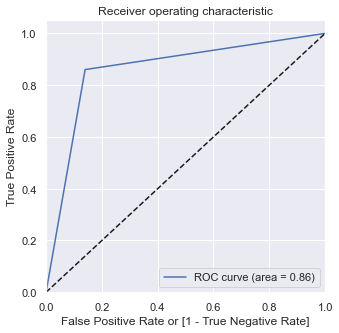

In [1097]:
draw_roc(y_train_pred_final.DEATH_EVENT, y_train_pred_final.predicted)

#### Test The model

In [1098]:
x_test_final = statmodel.add_constant(x_test_selected)
y_test_pred = logHF.predict(x_test_final)
y_test_pred[:10]

211    0.000397
19     0.263156
14     0.865274
155    0.545033
190    0.381549
92     0.015696
18     0.986616
283    0.020525
154    0.403664
252    0.002501
dtype: float64

In [1099]:
# Converting y_pred to a dataframe which is an array
y_red_final = pd.DataFrame(y_test_pred)
y_red_final.head()

,0
211,0.000397
19,0.263156
14,0.865274
155,0.545033
190,0.381549


In [1100]:
y_test_df = pd.DataFrame(y_test)

In [1101]:
# Putting Patient to index
y_test_df['PatientID'] = y_test_df.index

In [1102]:
y_red_final.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1103]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_red_final],axis=1)

In [1104]:
y_pred_final.head()

,DEATH_EVENT,PatientID,0
0,0,211,0.000397
1,1,19,0.263156
2,0,14,0.865274
3,0,155,0.545033
4,0,190,0.381549


In [1105]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'DEATH_Prob'})

In [1106]:
y_pred_final['final_predicted'] = y_pred_final.DEATH_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,DEATH_EVENT,PatientID,DEATH_Prob,final_predicted
0,0,211,0.000397,0
1,1,19,0.263156,0
2,0,14,0.865274,1
3,0,155,0.545033,1
4,0,190,0.381549,0


Accuracy on Test set 0.7816091954022989
Accuracy on the training set 0.8601398601398601


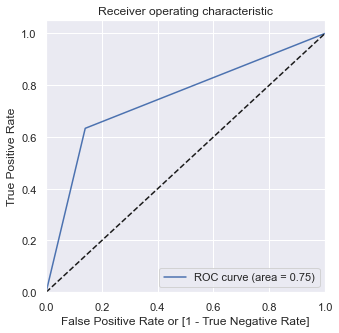

In [1117]:
# Let's check the overall accuracy.
print('Accuracy on Test set',metrics.accuracy_score(y_pred_final.DEATH_EVENT, y_pred_final.final_predicted))
print('Accuracy on the training set',metrics.accuracy_score(y_train_pred_final.DEATH_EVENT, y_train_pred_final.predicted))
draw_roc(y_pred_final.DEATH_EVENT, y_pred_final.final_predicted)

## Gradient Boosting

In [1108]:
# Import Gradient Boost Liberary
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [1109]:
# Create Pipeline
pipelines = {
    "gb": make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

In [1110]:
gb_hyperparameters = {
        "gradientboostingclassifier__n_estimators": [100, 200],
        'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
        'gradientboostingclassifier__max_depth': [1, 3, 5]
}
hyperparameters = {"gb": gb_hyperparameters}

In [1111]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv= 10, n_jobs= -1)
    
    # Fit model on X_train, y_train
    model.fit(x_train_selected, y_res)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

gb has been fitted.


In [1112]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

gb 0.9093596059113299


In [1113]:
for name, model in fitted_models.items():
    pred = model.predict(x_test_selected)
    train_pred = model.predict(x_train_selected)
    print('Accuracy on Test set:', accuracy_score(y_test, pred))
    print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, pred))
    print('Accuracy on Train set:', accuracy_score(y_res, train_pred))
    print("Confusion Matrix on Train Set:\n", confusion_matrix(y_res, train_pred))

Accuracy on Test set: 0.8390804597701149
Confusion Matrix on Test Set:
 [[48  9]
 [ 5 25]]
Accuracy on Train set: 1.0
Confusion Matrix on Train Set:
 [[143   0]
 [  0 143]]


No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.91      0.84      0.87        57
           1       0.74      0.83      0.78        30

    accuracy                           0.84        87
   macro avg       0.82      0.84      0.83        87
weighted avg       0.85      0.84      0.84        87

Accuracy of Random Forest Classifier on training set: 1.000000
Accuracy of Random Forest Classifier on test set: 0.839080


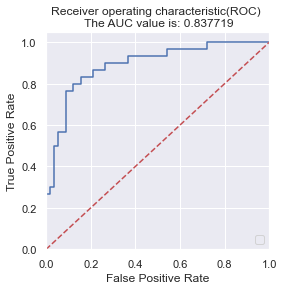

In [1114]:
# Getting key metrics
print(classification_report(y_test, pred))

print('Accuracy of Random Forest Classifier on training set: {:2f}'.format(model.score(x_train_selected,y_res)))
print('Accuracy of Random Forest Classifier on test set: {:2f}'.format(model.score(x_test_selected,y_test)))

# Plotting ROC curve
roc_cure_plot(model,x_test_selected)

## Support Vector Machine SVM

In [1115]:
# import SVC classifier
from sklearn.svm import SVC
svc=SVC()
svc.probability = True

# fit classifier to training set
svc.fit(x_train_selected,y_res)


# make predictions on test set
y_svm_pred=svc.predict(x_test_selected)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8046


No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.84      0.89      0.86        57
           1       0.77      0.67      0.71        30

    accuracy                           0.82        87
   macro avg       0.80      0.78      0.79        87
weighted avg       0.81      0.82      0.81        87

Accuracy of Random Forest Classifier on training set: 0.891608
Accuracy of Random Forest Classifier on test set: 0.816092


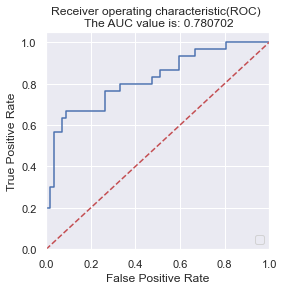

In [1116]:
# Getting key metrics
print(classification_report(y_test, y_svm_pred))


print('Accuracy of Random Forest Classifier on training set: {:2f}'.format(svc.score(x_train_selected,y_res)))
print('Accuracy of Random Forest Classifier on test set: {:2f}'.format(svc.score(x_test_selected,y_test)))

# Plotting ROC curve

roc_cure_plot(svc,x_test_selected)